1. Thống kê mô tả cơ bản

a. Giá trị nhỏ nhất (min), lớn nhất (max), trung bình (mean), trung vị (median) và mode (giá trị thường xuất hiện nhất)


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("dulieuxettuyendaihoc.csv");
df.head()

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [2]:
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')
# Mục đích: Đây là các phép tính cơ bản để biết về giá trị nhỏ nhất, lớn nhất, trung bình và trung vị của biến M1, đồng thời tính giá trị mode của biến KT.
# min(): Giá trị nhỏ nhất của cột M1.
# max(): Giá trị lớn nhất của cột M1.
# mean(): Giá trị trung bình của M1, tính bằng tổng các giá trị chia cho số lượng giá trị.
# median(): Trung vị là giá trị nằm ở giữa khi sắp xếp các giá trị theo thứ tự.
# mode(): Giá trị xuất hiện nhiều nhất trong cột KT.

1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

2.5



b. Tính tứ phân vị (quantile) và độ rộng khoảng tứ phân vị (IQR)

In [3]:
df['M1'].quantile(0.25)
df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

# Tứ phân vị:
# quantile(0.25): Là giá trị mà 25% dữ liệu nằm dưới nó (Q1).
# quantile(0.75): Là giá trị mà 75% dữ liệu nằm dưới nó (Q3).
# IQR (Interquartile Range): Độ rộng khoảng tứ phân vị là khoảng giữa Q1 và Q3, được dùng để xác định mức độ phân tán của dữ liệu và phát hiện các giá trị ngoại lai (outliers).


np.float64(2.25)

c. Khoảng biến thiên (Range)

In [4]:
df['M1'].max() - df['M1'].min()
# Mục đích: Tính toán khoảng biến thiên, là hiệu giữa giá trị lớn nhất và nhỏ nhất, cho biết mức độ phân tán của dữ liệu M1.


np.float64(6.0)

d. Phương sai và độ lệch chuẩn

In [5]:
df['M1'].var()
df['M1'].std()
df[['M1','M2']].std()
# Phương sai (var): Đo độ phân tán của dữ liệu quanh giá trị trung bình. Phương sai càng cao, dữ liệu càng phân tán.
# Độ lệch chuẩn (std): Là căn bậc hai của phương sai, cho biết mức độ thay đổi trung bình so với giá trị trung bình.

M1    1.424408
M2    1.060053
dtype: float64

2. Thống kê toàn bộ dữ liệu

a. Hàm describe()

In [7]:
df['M1'].describe()
df[['M1','M2','M3']].describe()
# Mục đích: Hàm describe() cung cấp các thống kê tổng quan cho dữ liệu, bao gồm:
# Số lượng phần tử (count).
# Trung bình (mean).
# Độ lệch chuẩn (std).
# Giá trị nhỏ nhất (min).
# Các tứ phân vị Q1 (25%), Q2 (50%, hay trung vị), và Q3 (75%).
# Giá trị lớn nhất (max).


,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


3. Hệ số biến thiên (Coefficient of Variation - CV)


In [8]:
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)
# Mục đích: Hệ số biến thiên là tỷ lệ giữa độ lệch chuẩn và trung bình, thể hiện mức độ phân tán tương đối. CV cao nghĩa là dữ liệu có mức phân tán lớn so với trung bình.

[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

4. Thống kê mô tả theo nhóm (groupby)

In [9]:
df.groupby('GT')['M1'].describe()
df.groupby('GT')['M2'].std() / df.groupby('GT')['M2'].mean()
# Mục đích: Hàm groupby() giúp chia dữ liệu thành các nhóm dựa trên giá trị của cột GT (giới tính) 
# và sau đó tính toán các thống kê mô tả cho từng nhóm.


GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

5. Trực quan hóa phân phối dữ liệu

a. Biểu đồ histogram

<Axes: >

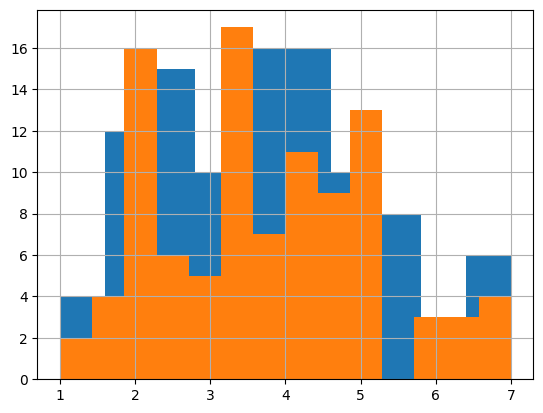

In [11]:
df['M1'].hist()
df['M1'].hist(bins=14)
# Mục đích: Vẽ biểu đồ histogram để xem phân phối dữ liệu của biến M1.
# Biểu đồ giúp bạn thấy tần suất xuất hiện của các giá trị trong khoảng nhất định.

b. Biểu đồ mật độ Kernel Density Estimation (KDE)

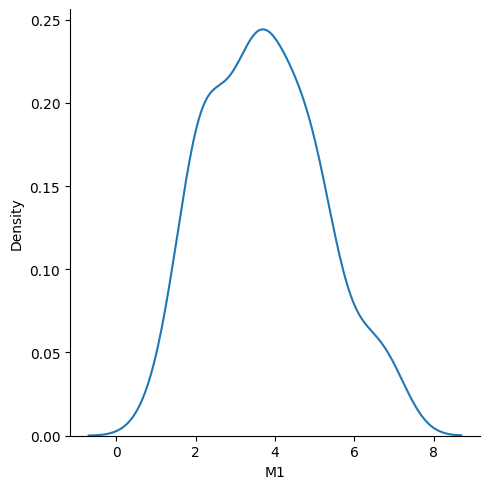

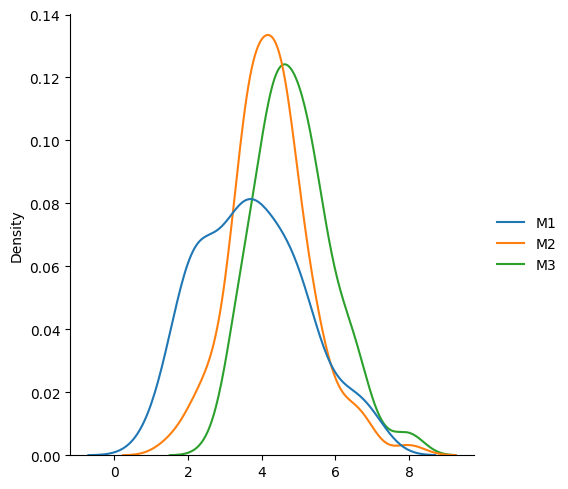

In [12]:
sns.displot(df, x='M1', kind='kde')
sns.displot(data = df[['M1','M2','M3']], kind='kde')
# Mục đích: KDE là một cách ước tính mật độ xác suất của một biến ngẫu nhiên, biểu diễn dưới dạng một đường cong mượt mà.
# KDE giúp bạn hiểu rõ hơn về phân phối dữ liệu thay vì chỉ nhìn vào các thanh của histogram.


6. Độ lệch (skewness) và độ nhọn (kurtosis)

In [13]:
df['M1'].skew()
df[['M1','M2','M3']].kurtosis()
# Skewness: Đo lường độ lệch của phân phối dữ liệu. Nếu skewness dương, phân phối nghiêng về phía bên phải, nếu âm thì nghiêng về bên trái.
# Kurtosis: Đo lường độ nhọn của phân phối. Giá trị kurtosis cao chỉ ra phân phối có đỉnh nhọn, trong khi kurtosis thấp nghĩa là phân phối có đỉnh thấp, dẹt.

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

7. Biểu đồ hộp (Boxplot)

<Axes: xlabel='M1', ylabel='GT'>

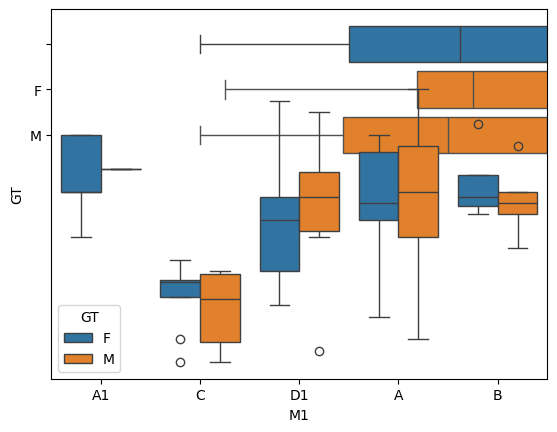

In [14]:
sns.boxplot(data=df['M1'], orient="h")
sns.boxplot(x='M1', y='GT',data=df, orient='h')
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
# Mục đích: Biểu đồ hộp giúp thể hiện rõ hơn về phân bố dữ liệu, các giá trị ngoại lai (outliers), và độ biến động. Nó bao gồm:
# Hộp: Đoạn giữa Q1 và Q3 (khoảng tứ phân vị).
# Đường giữa hộp: Trung vị (Q2).
# Whiskers: Giá trị nhỏ nhất và lớn nhất không phải là ngoại lai.
# Điểm ngoài hộp (outliers): Các giá trị nằm ngoài khoảng tứ phân vị.

8. Phân tích tương quan giữa các biến

a. Hiệp phương sai (Covariance) và tương quan (Correlation)

In [15]:
df[['M1','M2']].cov()
df[['M1','M2']].corr()
# Covariance: Đo lường mức độ hai biến thay đổi cùng nhau. Nếu giá trị dương thì hai biến thay đổi cùng chiều, nếu âm thì thay đổi ngược chiều.
# Correlation: Là hệ số tương quan, đo mức độ tương quan tuyến tính giữa hai biến. Giá trị nằm trong khoảng từ -1 (tương quan nghịch hoàn hảo) đến 1 (tương quan thuận hoàn hảo).

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


b. Biểu đồ scatter và đường hồi quy

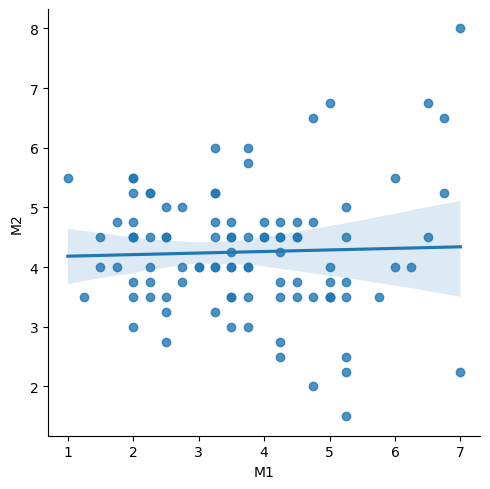

In [16]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
#Mục đích: Biểu đồ scatter kết hợp với đường hồi quy để xem mối quan hệ tuyến tính giữa hai biến M1 và M2.

c. Ma trận tương quan (Heatmap)

<Axes: >

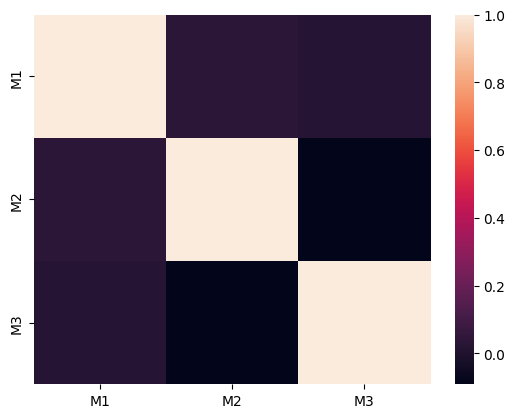

In [17]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False)
#Mục đích: Heatmap giúp bạn hình dung trực tiếp các hệ số tương quan giữa các cặp biến trong M1, M2, M3.

d. Biểu đồ Pairplot

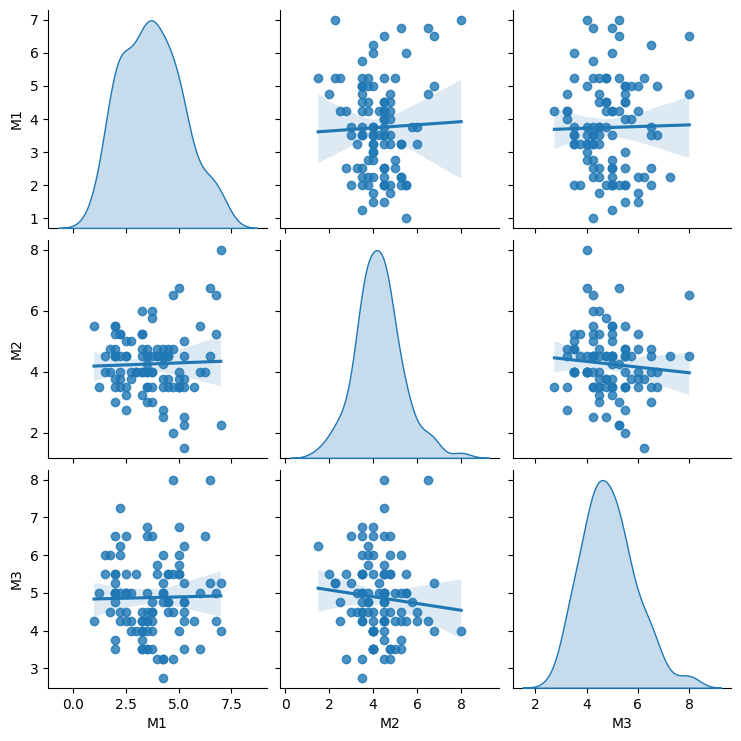

In [18]:
sns.pairplot(df[['M1','M2','M3']], diag_kind='kde', kind='reg')
#Mục đích: Pairplot giúp vẽ biểu đồ phân phối và quan hệ giữa các cặp biến trong M1, M2, M3, bao gồm cả đường hồi quy.
